## Problem Description

For this task you will investigate the stabilization of the inverted double pendulum on a cart. This environment is set up in the form of a continuous state and action space. It is defined within the file ``DoubleCartpole_env.py``and must be saved in the same folder for this notebook to be executable.


The inverted double pendulum is a typical control task that is often used to verify the performance of nonlinear control approaches. The challenge is to keep both poles in an upright position ($\theta_1=\theta_2=0$), which is an unstable equilibrium point of the system. This must be achieved by controlling the accelerating force $F$ of the cart, which is the action in this setup.

If you are interested in the modeling of this environment you may have a look at [this document](https://www3.math.tu-berlin.de/Vorlesungen/SoSe12/Kontrolltheorie/matlab/inverted_pendulum.pdf).

The state and action space of the environment are defined by



$$
x_k = 
\begin{bmatrix}
p_k \\ v_k \\
\theta_{1,k} \\ \omega_{1,k} \\
\theta_{2,k} \\ \omega_{2,k} \\
\end{bmatrix}
\in
\begin{bmatrix}
[-2.4 \, \text{m}, 2.4 \, \text{m}] \\ 
[-\infty, \infty] \\
[-\pi, \pi] \\ 
[-\infty, \infty] \\
[-\pi, \pi] \\ 
[-\infty, \infty] \\
\end{bmatrix},
\quad
u_k = F \in [-10 \, \text{N}, 10 \, \text{N}],
$$
with
$$
v = \frac{\text{d}}{\text{d}t}p, \quad
\omega_1 = \frac{\text{d}}{\text{d}t}\theta_1, \quad
\omega_2 = \frac{\text{d}}{\text{d}t}\theta_2.
$$

Whenever the positional constraint $p \in [-2.4 \, \text{m}, 2.4 \, \text{m}]$ is violated, the done flag will be set and the environment will not accept further action inputs before it has been reset. Concerning $\theta_1, \theta_2$, both poles may perform an arbitrary number of turns but the angle will always be given out within the interval $[-\pi, \pi]$.

After each reset, the environment will be placed in the initial state 
$
x_0 =
\begin{bmatrix}
0 & 0 &
n_1 & 0 &
n_2 & 0
\end{bmatrix}^\text{T}
$ with a small random initial deviation $n_1, n_2 \in [-3^{\circ}, 3^{\circ}]$. An episode will automatically terminate after $k_\text{f}=200$ time steps (the done flag will be set also in this case).

The parameterization of the environment is summarized in the following table.

| parameter       |                                  value |                            definition |
|:---------------:|---------------------------------------:|--------------------------------------:|
| $m_\text{cart}$ | $$1 \, \text{kg}$$                     |                       mass of the cart|
| $l_1$           | $$1 \, \text{m}$$                      |               length of the first pole|
| $m_1$           | $$0.1 \, \text{kg}$$                   |               mass of the first weight|
| $l_2$           | $$1 \, \text{m}$$                      |              length of the second pole|
| $m_2$           | $$0.1 \, \text{kg}$$                   |              mass of the second weight|
| $g$             | $$9.8 \, \frac{\text{m}}{\text{s}^2}$$ |             gravitational acceleration|
| $T_\text{s}$    | $$0.02 \,\text{s}$$                    |                          sampling time|

In [2]:
%conda install -c pytorch pytorch torchvision


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rushi\anaconda3

  added / updated specs:
    - pytorch
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.2.1   |       haa95532_0         123 KB
    certifi-2021.10.8          |   py38haa95532_2         152 KB
    conda-4.12.0               |   py38haa95532_0        14.5 MB
    cudatoolkit-11.3.1         |       h59b6b97_2       545.3 MB
    libuv-1.40.0               |       he774522_0         255 KB
    openssl-1.1.1m             |       h2bbff1b_0         4.8 MB
    pytorch-1.11.0             |py3.8_cuda11.3_cudnn8_0        1.23 GB  pytorch
    pytorch-mutex-1.0          |             cuda           3 KB  pytorch
    torchvision-0.12.0         |       py38_cu113         9.0 MB  pytorch
 

cudatoolkit-11.3.1   | 545.3 MB  | ######     |  61% 
cudatoolkit-11.3.1   | 545.3 MB  | ######     |  61% 
cudatoolkit-11.3.1   | 545.3 MB  | ######     |  61% 
cudatoolkit-11.3.1   | 545.3 MB  | ######1    |  61% 
cudatoolkit-11.3.1   | 545.3 MB  | ######1    |  61% 
cudatoolkit-11.3.1   | 545.3 MB  | ######1    |  61% 
cudatoolkit-11.3.1   | 545.3 MB  | ######1    |  62% 
cudatoolkit-11.3.1   | 545.3 MB  | ######1    |  62% 
cudatoolkit-11.3.1   | 545.3 MB  | ######1    |  62% 
cudatoolkit-11.3.1   | 545.3 MB  | ######1    |  62% 
cudatoolkit-11.3.1   | 545.3 MB  | ######2    |  62% 
cudatoolkit-11.3.1   | 545.3 MB  | ######2    |  62% 
cudatoolkit-11.3.1   | 545.3 MB  | ######2    |  62% 
cudatoolkit-11.3.1   | 545.3 MB  | ######2    |  62% 
cudatoolkit-11.3.1   | 545.3 MB  | ######2    |  63% 
cudatoolkit-11.3.1   | 545.3 MB  | ######2    |  63% 
cudatoolkit-11.3.1   | 545.3 MB  | ######2    |  63% 
cudatoolkit-11.3.1   | 545.3 MB  | ######2    |  63% 
cudatoolkit-11.3.1   | 545.3

pytorch-1.11.0       | 1.23 GB   | ###7       |  38% 
pytorch-1.11.0       | 1.23 GB   | ###7       |  38% 
pytorch-1.11.0       | 1.23 GB   | ###7       |  38% 
pytorch-1.11.0       | 1.23 GB   | ###7       |  38% 
pytorch-1.11.0       | 1.23 GB   | ###7       |  38% 
pytorch-1.11.0       | 1.23 GB   | ###7       |  38% 
pytorch-1.11.0       | 1.23 GB   | ###7       |  38% 
pytorch-1.11.0       | 1.23 GB   | ###8       |  38% 
pytorch-1.11.0       | 1.23 GB   | ###8       |  38% 
pytorch-1.11.0       | 1.23 GB   | ###8       |  38% 
pytorch-1.11.0       | 1.23 GB   | ###8       |  38% 
pytorch-1.11.0       | 1.23 GB   | ###8       |  38% 
pytorch-1.11.0       | 1.23 GB   | ###8       |  38% 
pytorch-1.11.0       | 1.23 GB   | ###8       |  38% 
pytorch-1.11.0       | 1.23 GB   | ###8       |  39% 
pytorch-1.11.0       | 1.23 GB   | ###8       |  39% 
pytorch-1.11.0       | 1.23 GB   | ###8       |  39% 
pytorch-1.11.0       | 1.23 GB   | ###8       |  39% 
pytorch-1.11.0       | 1.23 

In [32]:
import numpy as np
import pandas as pd


import torch 
import torch.nn as nn
from torch.distributions import MultivariateNormal

from DoubleCartpole_env import DoubleCartPoleEnv
import sklearn
import random
import time
import copy
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import Axes3D
from collections import deque
import os


The following cell will simulate the environment using random actions. This is a testing cell for your convenience in order to test that everything has been initialized correctly.

In [33]:
#  This class stores all the data sampled before performing calculating the surrogate loss and updating model 
# parameters. After every 800 timesteps the RolloutBuffer is cleared for later use.
class RolloutBuffer:
    """
    actions: list of actions.
    states: list of states.
    logprobs: list of log of probability of action taken at current timestep under given policy.
    rewards: list of rewards for actions performed.
    dones: list of done flag for every action taken.
    """
    def __init__(self):
        # Initialize all list.
        self.actions = []
        self.states = []
        self.logprobs = []
        self.rewards = []
        self.dones = []

    def clear(self):
        # Clear all the list.
        del self.actions[:]
        del self.states[:]
        del self.logprobs[:]
        del self.rewards[:]
        del self.dones[:]

In [34]:
# ActorCritic class is Neural Network used as function approximator to approximate policy and its expected return 
# given the state. NN is what makes it easier to apply PPO to continuous state and action space problem.

class ActorCritic(nn.Module):
    def __init__(self, state_dim, action_dim, action_std_init):
        super(ActorCritic, self).__init__()

        self.action_dim = action_dim
        # Instead of directly using variane as input to normal distribution, standard deviation is set as hyperparameter 
        # and used to calculate the variance.
        self.action_var = torch.full((action_dim,), action_std_init * action_std_init)
        # Actor NN
        self.actor = nn.Sequential(
            nn.Linear(state_dim, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, action_dim),
            nn.Tanh()
        )
        # Critic NN
        self.critic = nn.Sequential(
                        nn.Linear(state_dim, 64),
                        nn.Tanh(),
                        nn.Linear(64, 64),
                        nn.Tanh(),
                        nn.Linear(64, 1)
                    )

    def set_action_std(self, new_action_std):
        """
        Performance of PPO is sensitive to standard deviation. The standard deviation is decaying by 0.05 
        every 90000 timestep. This function sets new standard deviation to be used while creating normal distribution.
        """
        self.action_var = torch.full((self.action_dim,), new_action_std * new_action_std)

    def get_action(self, state):
        """
        Called during sampling phase.
        Passing a State through actor network to get the mean and plot normal distribution based on that mean to sample
        an action.
        """
        action_mean = self.actor(state)                            # output of actor network
        cov_mat = torch.diag(self.action_var).unsqueeze(dim=0)     # Variance of Normal distribution.
        policy = MultivariateNormal(action_mean, cov_mat)          # Generating a policy based on (mean, variance)

        action = policy.sample()                                   # Action sampeled from policy and to be applied.
        action_logprob = policy.log_prob(action)                   # log of prob. of that action given the distribution.

        # Since, we are only interested in the action and its prob., we do not perform SGD on them and can detach the 
        # computational graph associated with it.
        return action.detach(), action_logprob.detach()             
    

    def evaluate(self, state, action):
        """
        Called during update phase.
        In order to calculate the ratio of prob. of taking an action given a state under new policy, we need to
        pass the old sampled state and action taken old policy and get mean, value and logprob under new policy.
        New policy means updated model weights compared to the weights using which the action and value was approximated
        during sampling phase.
        """
        action_mean = self.actor(state)

        action_var = self.action_var.expand_as(action_mean)
        cov_mat = torch.diag_embed(action_var)
        policy = MultivariateNormal(action_mean, cov_mat)

        if self.action_dim == 1:
            action = action.reshape(-1, self.action_dim)
        action_logprobs = policy.log_prob(action)
        policy_entropy = policy.entropy()
        state_values = self.critic(state)
        # The 'action_logprobs' will be used to calculate the ratio for surrogate loss.
        # The 'state_values' will be used to calculate the MSE for critic loss.
        # The 'policy_entropy' will be used give bonus for exploration in final loss.
        return action_logprobs, state_values, policy_entropy

In [35]:
# This class is the heart of PPO. The Clipped surrogate loss for actor network and Mean squared error(MSE) for critic 
# network is calculated here. Then, SGD is performed on combination of actor, critic loss and weights are updated.

class PPO:
    def __init__(self, state_dim, action_dim, lr_actor, lr_critic, gamma, K_epochs, eps_clip, action_std_init=0.6):
        self.action_std = action_std_init

        self.gamma = gamma                                  # Discount factor
        self.eps_clip = eps_clip                            # Clipping range for Clipped Surrogate Function.
        self.K_epochs = K_epochs                            # Total number of epochs.

        self.buffer = RolloutBuffer()
        
        self.policy = ActorCritic(state_dim, action_dim, action_std_init)
        # Adam Optimizer to perform optimization given the loss on NN parameters.
        self.optimizer = torch.optim.Adam([
            {'params': self.policy.actor.parameters(), 'lr': lr_actor},
            {'params': self.policy.critic.parameters(), 'lr': lr_critic}
        ])
        
        # Sampling is always done under old policy(aka old weights) under the evaluation for update step is always done
        # under new policy(aka update/new weights). After 800 timestep * Number of Epochs,
        # old_policy parameters set same as new_policy parameters. 
        self.policy_old = ActorCritic(state_dim, action_dim, action_std_init)
        self.policy_old.load_state_dict(self.policy.state_dict())
        
        # Mean Squared Error 
        self.MseLoss = nn.MSELoss()

    def set_action_std(self, new_action_std):
        # Setting new standard deviation.
        self.action_std = new_action_std
        self.policy.set_action_std(new_action_std)
        self.policy_old.set_action_std(new_action_std)

    def decay_action_std(self, action_std_decay_rate, min_action_std):
        print("--------------------------------------------------------------------------------------------")
        # Calculate the new standard deviation corresponding to decay rate.
        self.action_std = self.action_std - action_std_decay_rate
        self.action_std = round(self.action_std, 2)
        # In case, standard deviation decays below threshold, set it to minimum.
        if self.action_std <= min_action_std:
            self.action_std = min_action_std
            print("setting actor output action_std to min_action_std : ", self.action_std)
        else:
            print("setting actor output action_std to : ", self.action_std)
        self.set_action_std(self.action_std)

    def select_action(self, state):
        """
        Selecting action under old policy during sampling phase. At same time, save the state and reward into 
        rollout buffer to be used during evaluation.
        """
        with torch.no_grad():
            state = torch.FloatTensor(state)
            action, action_logprob = self.policy_old.get_action(state)

        self.buffer.states.append(state)
        self.buffer.actions.append(action)
        self.buffer.logprobs.append(action_logprob)

        return action.detach().numpy().flatten()

    def update(self):
        """
        Note: Adam is Gradient descent algorithm. Therefore, it tries to find global minimum. For surrogate loss, 
        gradient ascent is requirred and therefore a negative surrogate loss is used during optimization using
        Adam. Maximization of loss function is equal to minimizing a negative loss function.
        """
        # Using Monte Carlo estimates of return we can calcuate the advantage function.
        rewards = []
        discounted_reward = 0
        
        # reward for terminal state is zero. Starting from terminal state, add the discounted reward collected
        # till the initial state and store them into rewards list. So, no bootstrapping.
        
        for reward, done in zip(reversed(self.buffer.rewards), reversed(self.buffer.dones)):
            if done:
                discounted_reward = 0
            discounted_reward = reward + (self.gamma * discounted_reward)
            rewards.insert(0, discounted_reward)

        # By normalizing the rewards, variance in advantage is reduced further.
        rewards = torch.tensor(rewards, dtype=torch.float32)
        rewards = (rewards - rewards.mean()) / (rewards.std() + 1e-7) # to avoid division by zero.

        # The buffer has multiple list. The list as it is cannot be passed to the NN made using pytorch.
        # Pytorch works with tensors and therefore, a conversion is done.
        
        old_states = torch.squeeze(torch.stack(self.buffer.states, dim=0)).detach()
        old_actions = torch.squeeze(torch.stack(self.buffer.actions, dim=0)).detach()
        old_logprobs = torch.squeeze(torch.stack(self.buffer.logprobs, dim=0)).detach()
        
        # Using the sampled date from old policy, calculate loss over multiple trajectories and perform optimization.
        # Data/ state tuple corresponding to 800 time steps is processed 'K_epochs' times before updating old_policy
        # parameters to same as new updated policy parameters.
        
        for _ in range(self.K_epochs):
            logprobs, state_values, policy_entropy = self.policy.evaluate(old_states, old_actions)
            state_values = torch.squeeze(state_values)

            # Finding the ratio (pi_theta / pi_theta__old)
            ratios = torch.exp(logprobs - old_logprobs.detach())

            # Finding surrogate loss and then maximizing it. Since, maximization of surrogate loss corresponds to 
            # increase in prob. of action which gives higher reward given the state. 
            advantages = rewards - state_values.detach()
            surr1 = ratios * advantages
            surr2 = torch.clamp(ratios, 1 - self.eps_clip, 1 + self.eps_clip) * advantages
            policy_loss = torch.min(surr1, surr2)

            # Combined loss of PPO
            value_loss = self.MseLoss(state_values, rewards)
            
            loss = -policy_loss + 0.5 * value_loss - 0.01 * policy_entropy

            # Performing Optimization step.
            self.optimizer.zero_grad()
            loss.mean().backward()
            self.optimizer.step()

        # Finally, old_policy is same as new _policy until next update phase.
        self.policy_old.load_state_dict(self.policy.state_dict())
        # Prepare buffer for next round of sampling by clearing all previous entries.
        self.buffer.clear()

    def save(self, checkpoint_path):
        """
        Save the weights and biases of old policy to be used later for evaluating PPO performance via rendering the 
        Environment.
        """
        torch.save(self.policy_old.state_dict(), checkpoint_path)

    def load(self, checkpoint_path):
        """
        Load previously trained model parameters for testing.
        """
        self.policy_old.load_state_dict(torch.load(checkpoint_path, map_location=lambda storage, loc: storage))
        self.policy.load_state_dict(torch.load(checkpoint_path, map_location=lambda storage, loc: storage))

In [36]:
# The Reward function used to guide PPO agent to achieve equilibrium position for the double pendulum.
def reward_function(state, done):
    """
    A nested reward function is implemented with a negative terminal condition.
    Reward is in range[-1, 1]. 
    Therefore, a successful episode with 200 timestep would convert to 200.
    
    if Condition 1: Check if the absolute angle of pole 1 is less than 15 degrees.
        ->> agent will get reward between [0, 0.5]
        if Condition 2: Check if the absolute angle of pole 2 is less than 15 degrees.
            ->> agent will get reward from previous condition plus another reward in range [0,0.5]
            ->> therefore, at equilibrium, reward = 1.0
    else:
        absolute angle of pole 1 is greater than 15 degrees and the state space associated with this state of environment
        is not worth exploring. Therefore, it makes sense to terminate the environment and reset/restart.
        reward = -1
        
    This means that agent will collect more reward trying to stay in arc of +15, -15 degrees. Every time, agent's
    action leads to a state outside the desired area, agent will get negative reward and a direct termination.
    """
    reward = 0
    if np.abs(np.degrees(state[2])) < 15:
        reward = (1 - np.abs(np.degrees(state[2])) * 0.01) / 2
        if np.abs(np.degrees(state[4])) < 15:
            reward = reward + (1 - np.abs(np.degrees(state[4])) * 0.01) / 2
    else:
        reward = -1
        done = True
    return reward, done

In [37]:
def unscaled_action(scaled_action, action_low=-10, action_high=10):
    """
    A tanh() activation function is applied before getting output from actor network. Therefore, the mean is bounded 
    to (-1, 1). The action space for the control problem is (-10, +10). An unscaling of action is needed to explore 
    the action space of control problem.
    """
    return action_low + (0.5 *(scaled_action + 1.0) * (action_high - action_low))

In [42]:
# By calling train(), we implement the training phase of PPO
def train():
    print("============================================================================================")
    # max. timestep per episode. For DoubleCartPoleEnv, time constraint is 200 timesteps. After that environment is 
    # reset.
    max_ep_len = 200
    # The training phase will sample and update for 1 million timestep.
    max_training_steps = int(1e6)

    # In order, to check ongoing progress, average reward is printed at every 10_000 timesteps.
    print_freq = 10_000
    
    # Saving model parameters at every 1_00_000 timesteps.
    save_model_freq = int(1e5)

    action_std = 0.6                                    # Initial standard deviation.
    action_std_decay_rate = 0.1                       # Decay rate of standard deviation.
    min_action_std = 0.1                                # Threshold standard deviation.
    action_std_decay_freq = int(2e5)                    # Decay the standard deviation every 2_00_000 timesteps

    env_name = "DoubleCartPoleEnv"
    update_timestep = 4000                              # set old_policy parameters to new_policy parameters.
    K_epochs = 100                                      # Number of epochs before updating old policy parameters.
    eps_clip = 0.2                                      # clip range for surrogate loss function.
    gamma = 0.99                                        # Discount factor.

    lr_actor = 3e-4                                     # Learning rate for optimizer of actor network.
    lr_critic = 0.001                                   # Learning rate for optimizer of critic network.

    print("Training Environment:" + env_name)
    env = DoubleCartPoleEnv()

    observation_shape = env.observation_space.shape[0]  # Observation shape
    action_shape = env.action_space.shape[0]            # Action shape

    # Creating a directory to store the model parameters during and after training.
    directory = "PPO_Trained"
    if not os.path.exists(directory):
          os.makedirs(directory)

    directory = directory + '/'
    if not os.path.exists(directory):
          os.makedirs(directory)
    
    checkpoint_path = directory + "PPO_{}.pth".format(env_name)
    print("save checkpoint path : " + checkpoint_path)
    print("--------------------------------------------------------------------------------------------")
    print("max training timesteps : ", max_training_steps)
    print("max timesteps per episode : ", max_ep_len)
    print("model saving frequency : " + str(save_model_freq) + " timesteps")
    print("printing average reward over episodes in last : " + str(print_freq) + " timesteps")
    print("--------------------------------------------------------------------------------------------")
    print("state space dimension : ", observation_shape)
    print("action space dimension : ", action_shape)
    print("--------------------------------------------------------------------------------------------")
    print("Initializing a continuous action space policy")
    print("--------------------------------------------------------------------------------------------")
    print("starting std of action distribution : ", action_std)
    print("decay rate of std of action distribution : ", action_std_decay_rate)
    print("minimum std of action distribution : ", min_action_std)
    print("decay frequency of std of action distribution : " + str(action_std_decay_freq) + " timesteps")

    print("--------------------------------------------------------------------------------------------")
    print("PPO update frequency : " + str(update_timestep) + " timesteps")
    print("PPO K epochs : ", K_epochs)
    print("PPO epsilon clip : ", eps_clip)
    print("discount factor (gamma) : ", gamma)
    print("--------------------------------------------------------------------------------------------")
    print("optimizer learning rate actor : ", lr_actor)
    print("optimizer learning rate critic : ", lr_critic)

    print("============================================================================================")

    agent = PPO(observation_shape,
                action_shape,
                lr_actor,
                lr_critic,
                gamma,
                K_epochs,
                eps_clip,
                action_std)

    print("Starting the Training")
    print("============================================================================================")

    # To keep track of the progress
    print_running_reward = 0    
    print_running_episodes = 0

    time_step = 0
    i_episode = 0
    counter = 0

    plot_episode = []
    plot_reward = []

    while time_step <= max_training_steps:
        obs = env.reset()
        current_ep_reward = 0
        for t in range(1, max_ep_len + 1):
            action = agent.select_action(obs)                           # Get action under old_policy given state.
            action = unscaled_action(action)                            # Unscale the action.
            obs, _, done, _ = env.step(action)                          # Apply the action to environment.
            reward, done = reward_function(obs, done)                   # Collect the reward from reward function.

            # Append the reward and done flag to buffer for calculating Monte Carlo returns during updating phase.
            agent.buffer.rewards.append(reward)
            agent.buffer.dones.append(done)                             

            time_step += 1
            current_ep_reward += reward

            if time_step % update_timestep == 0:
                # Perform updates using sampled data.
                agent.update()

            if time_step % action_std_decay_freq == 0:
                # Decay standard deviation by 0.1.
                agent.decay_action_std(action_std_decay_rate, min_action_std)

            if time_step % print_freq == 0:
                # print average reward during 10_000 timesteps
                print_avg_reward = print_running_reward / print_running_episodes
                print_avg_reward = round(print_avg_reward, 2)

                print("Episode : {} \t\t Timestep : {} \t\t Average Reward : {}".format(i_episode, time_step, print_avg_reward))

                print_running_reward = 0
                print_running_episodes = 0

            if time_step % save_model_freq == 0:

                # Save the model parameters for test phase and tracking performance.
                print("--------------------------------------------------------------------------------------------")
                print("Saving model at : " + checkpoint_path)
                agent.save(checkpoint_path)
                print("Model saved")
                counter += 1
                inter_checkpoint = directory + "PPO_{}_{}00K.pth".format(env_name, counter)
                print("--------------------------------------------------------------------------------------------")               
                print("Model parameters to check for intermediate performance saving:.")
                print("saving model at : " + inter_checkpoint)
                agent.save(inter_checkpoint)
                if counter == 10:
                    print(f"Intermediate model saved for {counter}M")   
                else:
                    print(f"Intermediate model saved for {counter}00K")                
                print("--------------------------------------------------------------------------------------------")
                
            if done:
                break

        print_running_reward += current_ep_reward
        
        # plot reward per 10 episode.
        if i_episode % 10 == 0:
            plot_episode.append(i_episode)
            plot_reward.append(current_ep_reward)

        print_running_episodes += 1

        i_episode += 1

    env.close()

    print("============================================================================================")
    print("Training Finished")

    
    return plot_episode, plot_reward

In [43]:
n_episode, reward_episode = train()

Training Environment:DoubleCartPoleEnv
save checkpoint path : PPO_Trained/PPO_DoubleCartPoleEnv.pth
--------------------------------------------------------------------------------------------
max training timesteps :  1000000
max timesteps per episode :  1000
model saving frequency : 100000 timesteps
printing average reward over episodes in last : 10000 timesteps
--------------------------------------------------------------------------------------------
state space dimension :  6
action space dimension :  1
--------------------------------------------------------------------------------------------
Initializing a continuous action space policy
--------------------------------------------------------------------------------------------
starting std of action distribution :  0.6
decay rate of std of action distribution :  0.1
minimum std of action distribution :  0.1
decay frequency of std of action distribution : 200000 timesteps
-------------------------------------------------------

Episode : 4190 		 Timestep : 610000 		 Average Reward : 179.09
Episode : 4241 		 Timestep : 620000 		 Average Reward : 180.08
Episode : 4291 		 Timestep : 630000 		 Average Reward : 183.66
Episode : 4342 		 Timestep : 640000 		 Average Reward : 185.4
Episode : 4392 		 Timestep : 650000 		 Average Reward : 182.44
Episode : 4444 		 Timestep : 660000 		 Average Reward : 181.04
Episode : 4495 		 Timestep : 670000 		 Average Reward : 179.46
Episode : 4546 		 Timestep : 680000 		 Average Reward : 180.86
Episode : 4596 		 Timestep : 690000 		 Average Reward : 184.5
Episode : 4647 		 Timestep : 700000 		 Average Reward : 184.63
--------------------------------------------------------------------------------------------
Saving model at : PPO_Trained/PPO_DoubleCartPoleEnv.pth
Model saved
--------------------------------------------------------------------------------------------
Model parameters to check for intermediate performance saving:.
saving model at : PPO_Trained/PPO_DoubleCartPoleEnv_70

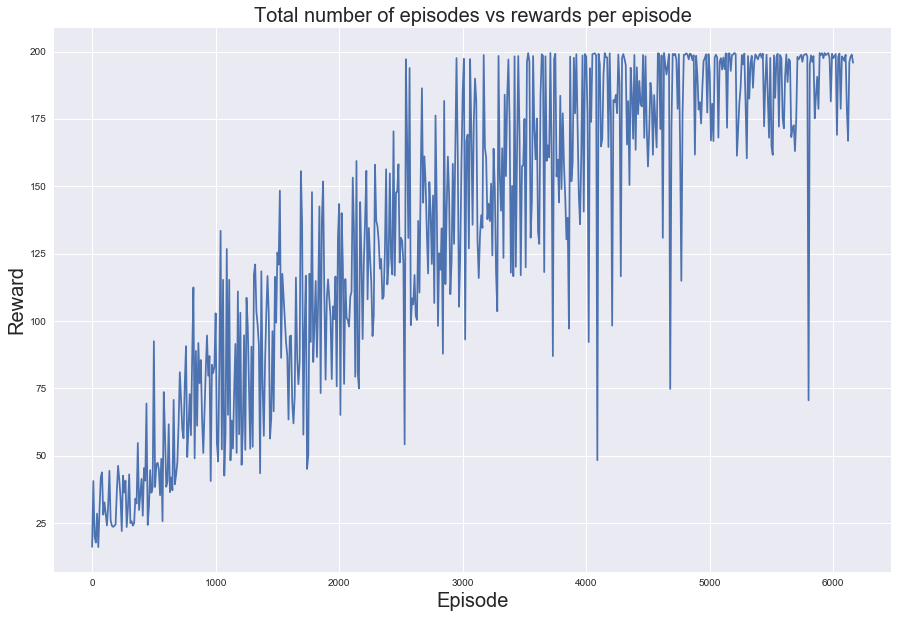

In [55]:
# Plot: Reward per every 10 episodes.
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(n_episode, reward_episode)
ax.set_title('Total number of episodes vs rewards per episode', fontsize=20)
ax.set_xlabel('Episode', fontsize=20)
ax.set_ylabel('Reward', fontsize=20)
plt.show()

Measure the performance of the resulting agent by calculating the median and variance of the mean absolute angle deviation (w.r.t. the desired equilibrium point) over the course of 50 validation episodes. Also, it would be very cool if your presentation slides would incorporate the animation of your RL agent in action. 

In [56]:
def test():
    env_name = "DoubleCartPoleEnv"
    max_ep_len = 200
    action_std = 0.4
    
    # To help visualize the learning of Agent. 
    render = True
    total_test_episodes = 50
    K_epochs = 100
    eps_clip = 0.2
    gamma = 0.99

    lr_actor = 3e-4
    lr_critic = 0.001

    env = DoubleCartPoleEnv()
    observation_shape = env.observation_space.shape[0]
    action_shape = env.action_space.shape[0]

    ppo_agent = PPO(observation_shape, action_shape, lr_actor, lr_critic, gamma, K_epochs, eps_clip,
                    action_std)


    directory = "PPO_Trained" + '/' 
    checkpoint_path = directory + "PPO_{}.pth".format(env_name)
    print("loading network from : " + checkpoint_path)

    ppo_agent.load(checkpoint_path)

    print("--------------------------------------------------------------------------------------------")

    test_running_reward = 0

    for ep in range(1, total_test_episodes + 1):
        ep_reward = 0
        state = env.reset()

        for t in range(1, max_ep_len + 1):
            action = ppo_agent.select_action(state)
            action = unscaled_action(action)
            state, _, done, _ = env.step(action)
            reward, done, = reward_function(state, done)

            ep_reward += reward

            if render:
                env.render()
            if done:
                break

        # clear buffer
        ppo_agent.buffer.clear()

        test_running_reward += ep_reward
        print('Episode: {} \t\t TimeSteps: {} \t\t Reward: {}'.format(ep, t, round(ep_reward, 2)))
        ep_reward = 0

    env.close()

    print("============================================================================================")

    avg_test_reward = test_running_reward / total_test_episodes
    avg_test_reward = round(avg_test_reward, 2)
    print("average test reward : " + str(avg_test_reward))

    print("============================================================================================")

In [57]:
test()

loading network from : PPO_Trained/PPO_DoubleCartPoleEnv.pth
--------------------------------------------------------------------------------------------
Episode: 1 		 TimeSteps: 200 		 Reward: 199.27
Episode: 2 		 TimeSteps: 84 		 Reward: 61.68
Episode: 3 		 TimeSteps: 200 		 Reward: 197.42
Episode: 4 		 TimeSteps: 200 		 Reward: 198.52
Episode: 5 		 TimeSteps: 200 		 Reward: 199.05
Episode: 6 		 TimeSteps: 200 		 Reward: 197.38
Episode: 7 		 TimeSteps: 200 		 Reward: 174.83
Episode: 8 		 TimeSteps: 200 		 Reward: 198.15
Episode: 9 		 TimeSteps: 200 		 Reward: 199.02
Episode: 10 		 TimeSteps: 200 		 Reward: 198.35
Episode: 11 		 TimeSteps: 200 		 Reward: 197.9
Episode: 12 		 TimeSteps: 200 		 Reward: 198.87
Episode: 13 		 TimeSteps: 200 		 Reward: 199.24
Episode: 14 		 TimeSteps: 200 		 Reward: 197.38
Episode: 15 		 TimeSteps: 200 		 Reward: 199.34
Episode: 16 		 TimeSteps: 200 		 Reward: 195.33
Episode: 17 		 TimeSteps: 200 		 Reward: 198.83
Episode: 18 		 TimeSteps: 200 		 Reward: 1